---
title: "Clustering"
format: html
---

Clustering my data may reveal if certain states or years may be grouped together. This can reveal trends in my data set, like if certain regions are developing in similar ways.

# KMEAN

K-Means Clustering seperates an unlabeled dataset into distinct clusters. In this method, the parameter K signifies the predetermined number of clusters to be formed during the process. For instance, if K=2, the data will be grouped into two clusters, and if K=3, there will be three clusters, and so forth.

# DBSAN


DBSCAN clustering aims to detect unique clusters within a dataset by considering clusters as contiguous areas with high point density. The underlying concept is that a cluster in the data space is characterized by a region with high point density, and it is separated from other clusters by regions with low point density.

# Hierarchial Clustering

Hierarchial clustering involves treating each observation as an individual cluster. The algorithm iteratively performs the following two steps: (1) pinpoint the two clusters that exhibit the closest proximity, and (2) merge the two clusters with the highest similarity. This sequential process persists until all clusters have been amalgamated into a unified cluster.

# Model Selection Methods

Elbow: This method aids in determining the optimal number of clusters by assessing how the introduction of a new cluster enhances the model relative to the increase in complexity. It involves identifying the point where adding more clusters ceases to significantly enhance the grouping, resembling a sweet spot in the analysis.

Silhouette Score: This method evaluates the similarity of an object to its own cluster in comparison to other clusters. A higher silhouette score indicates well-separated clusters, assisting in determining the number of clusters that yield the most effective separation.

# Data Selection

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
record=pd.read_csv('data/RecordData.csv')
record=record.drop(['Year','DP05_0073E','RegionName'],axis=1)
record.head()

,DP02_0001E,DP02_0002E,DP02_0003E,DP02_0007E,DP02_0011E,DP02_0037E,DP02_0060E,DP02_0061E,DP02_0062E,DP02_0063E,...,DP04_0047E,DP04_0134E,DP05_0001E,DP05_0004E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,Typical Home Value
0,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,0.033732,...,0.007581,0.050667,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0.038688
1,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,1.429793,...,-0.000968,0.024112,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,0.070360
2,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,0.007408,...,-0.004602,0.066914,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,0.263465
3,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,0.014854,...,0.017788,0.060395,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,0.076587
4,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,-0.065209,...,-0.043262,-0.019983,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0.005789


# Hyperparameter Tuning

In [8]:
scaler=StandardScaler()
scaled=scaler.fit_transform(record)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

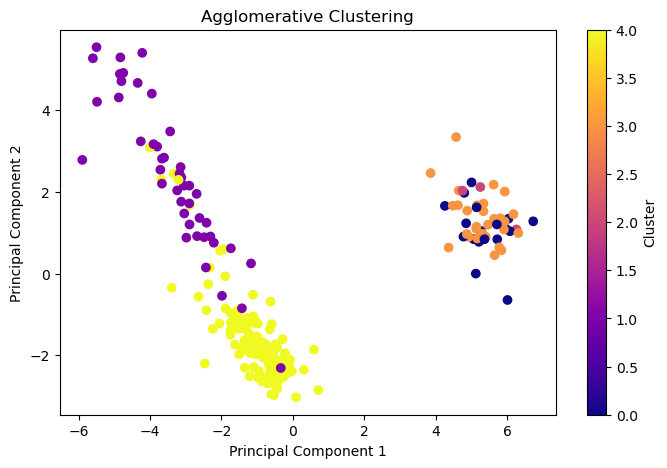

In [9]:
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_cluster.fit_predict(record)
plt.figure(figsize=(8, 5))
plt.scatter(components[:, 0], components[:, 1], c=agg_labels, cmap='plasma')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

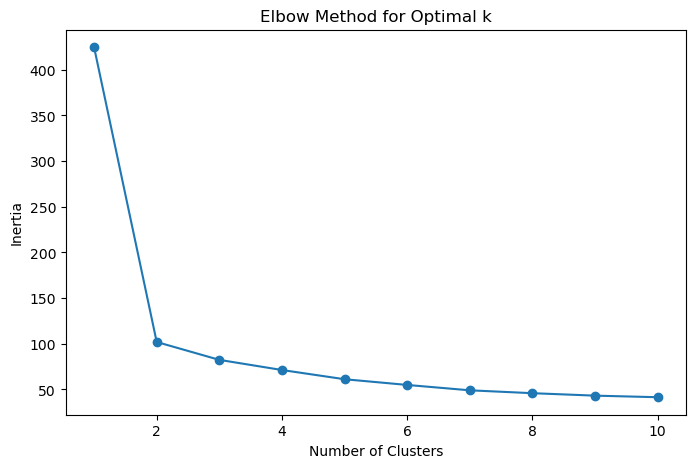

In [3]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(record)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

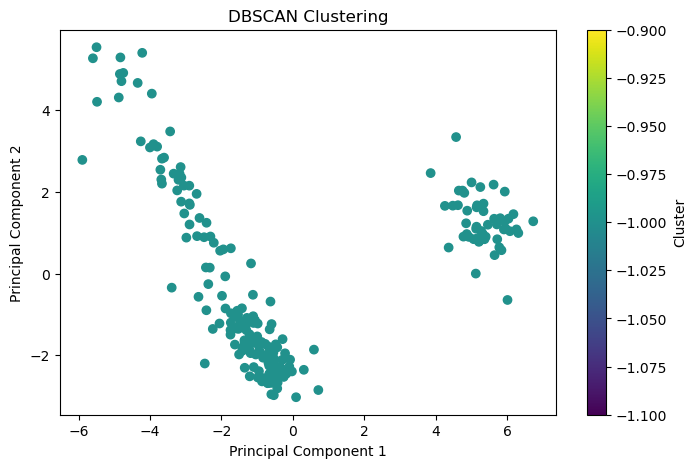

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(scaled)
plt.figure(figsize=(8, 5))
plt.scatter(components[:, 0], components[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Results

It seems that hierachial clustering had the most meaningful results.I think there are a lot of connections to be made in my data because it is based on years and states. Obviously some years there will be higher percent changes overall, and states close to each other most likely move in similar directions

# Conclusion

It is difficult to conclude much from this analysis as clustering does not apply too much to my project.